# L4: PyTorch Functions

### Goals of this Lecture

- Elementwise application of functions
- Manual computation of derivatives
- Chain rule
- Computation graphs

## Basic Elementwise Functions

What methematical functions do you know?

Functions which are part of torch.Tensor (https://pytorch.org/docs/stable/tensors.html):
- exponential function: ```.exp()``` or ```.exp_()```
- logarithm: ```.log()``` or ```.log_()```
- trigonometric functions: ```.sin()```, ```.cos()```, and many more

In [1]:
import torch
a = torch.rand(2,2)
b = torch.log(a)
c = a.log()
print(b)
print(c)

tensor([[-1.8409, -0.4050],
        [-0.5157, -0.7912]])
tensor([[-1.8409, -0.4050],
        [-0.5157, -0.7912]])


- ```torch.where(condition,x,y)```:

In [2]:
x = torch.randn(2,3)
y = torch.ones(2,3)
z = torch.where(x>0, x, y)
print(x)
print(y)
print(z)

tensor([[-0.8217,  0.0802, -0.1373],
        [-1.6168, -0.2044, -0.5885]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[1.0000, 0.0802, 1.0000],
        [1.0000, 1.0000, 1.0000]])


Functions which are part of torch.nn (https://pytorch.org/docs/stable/nn.html) are often also referred to as **activation functions** in the context of deep nets. Functions within torch.nn define ```nn.Modules``` (essentially functions which may have states). This early in the class those states aren't yet important to us. Example:


- rectified linear unit (ReLU): $$\max(0,x_i)$$

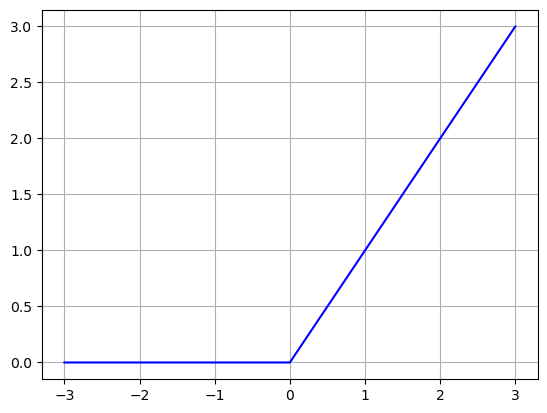

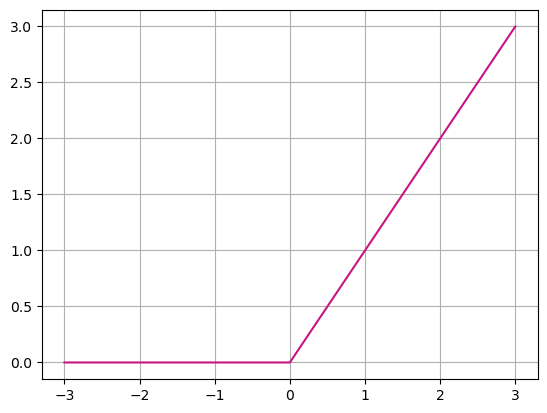

In [8]:
import matplotlib.pyplot as plt

reluFun = torch.nn.ReLU()
a = torch.linspace(-3,3,1000)
b = reluFun(a)
c = torch.nn.functional.relu(a)
plt.figure()
plt.plot(a, b, 'blue')
plt.grid(True)

plt.figure()
plt.plot(a, c, 'mediumvioletred')
plt.grid(True)

- sigmoid function: $$\sigma(x_i) = \frac{1}{1+e^{-x_i}}$$

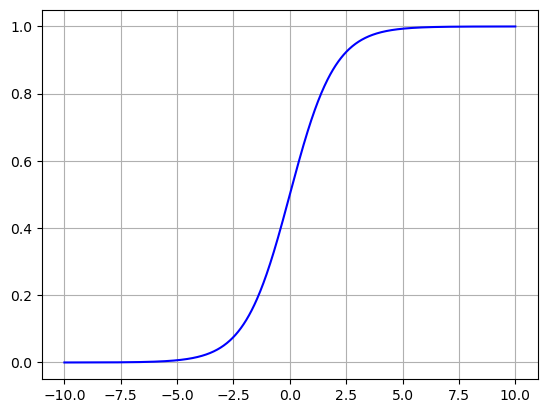

In [9]:
sigmoidFun = torch.nn.Sigmoid()
a = torch.linspace(-10,10,1000)
b = sigmoidFun(a)
plt.plot(a, b, 'blue')
plt.grid(True)

## Lecture Exercise: Customizing sigmoid
Suppose we would like to customize the sigmoid function by stretching/compressing or shifting.

a) Write your own implementation of the sigmoid function with input tensor ``x`` and temperature argument ``tau`` where the sigmoid has a sharper transition (compressed) for smaller values of ``tau`` and slower (stretched) transition for larger values of ``tau``. Make sure your implementation is the same as conventional sigmoid for $\tau=1$.

b) Write an implementation of sigmoid that shifts the 0.5 probability point to an arbitrary location given by ``b``. Make sure your implementation is the same as conventional sigmoid for $b=0$.

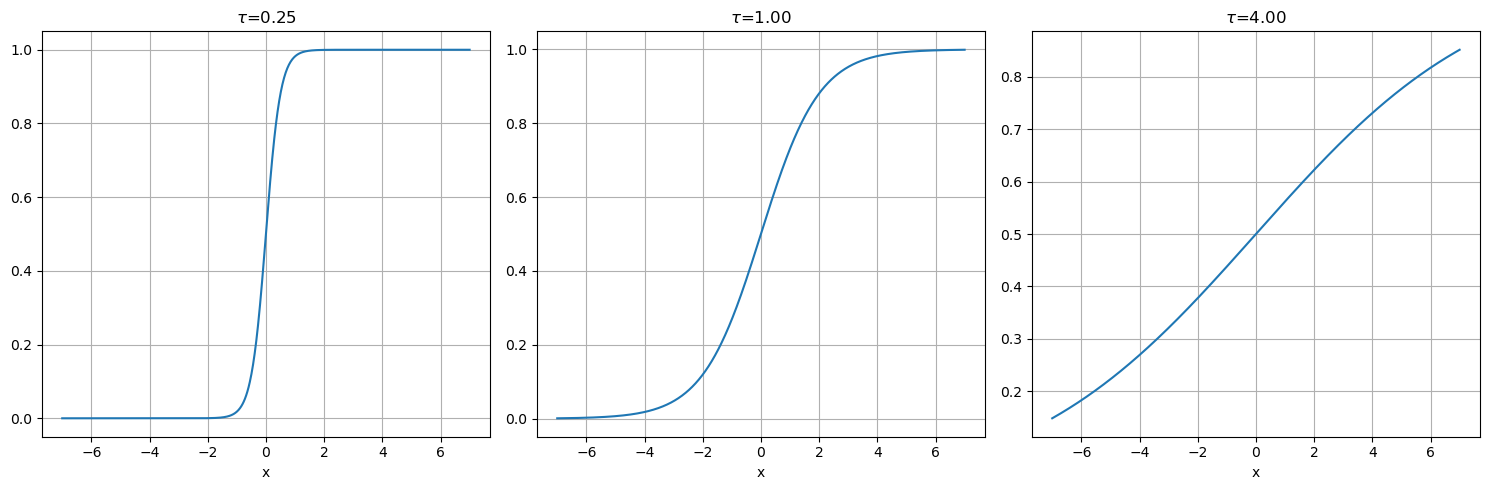

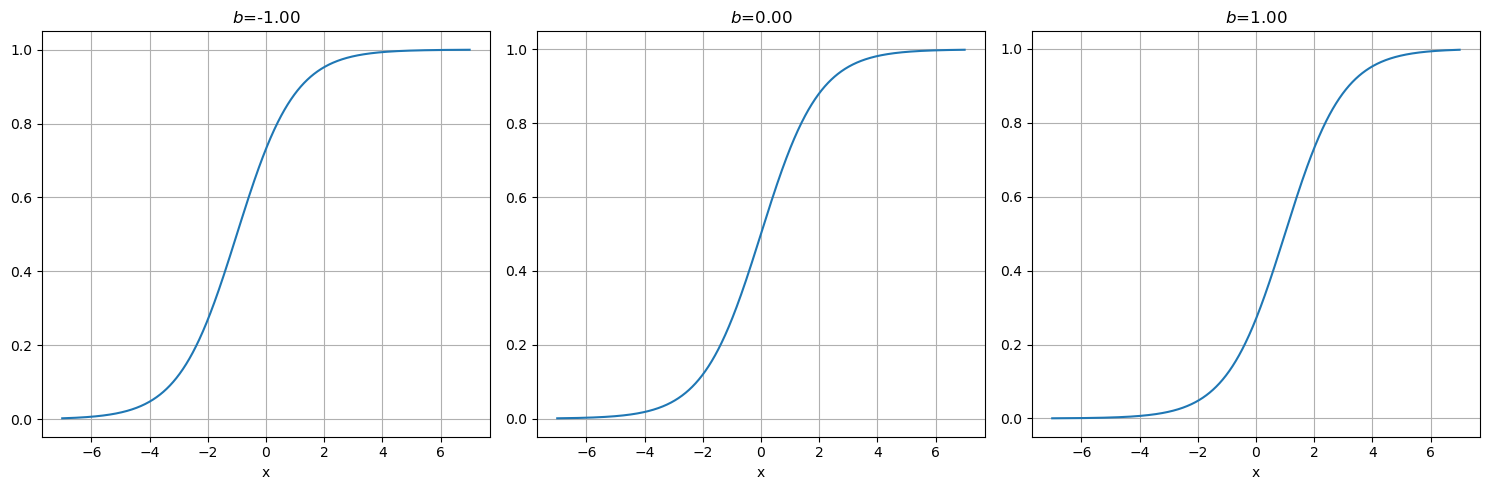

In [10]:
import torch

def my_sigmoid_a(x, tau):
    # write code to compute new sigmoid result using x and tau
    return 1/(1+torch.exp(-x/tau))

def my_sigmoid_b(x, b):
    # write code to compute new sigmoid result by centering about b
    return 1/(1+torch.exp(-(x-b)))

taus = [0.25, 1, 4]
x = torch.linspace(-7, 7, 1000)
# plot results
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.plot(x, my_sigmoid_a(x, taus[0]))
plt.title(r'$\tau$={:.2f}'.format(taus[0]))
plt.xlabel('x')
plt.grid(True)
plt.subplot(132)
plt.plot(x, my_sigmoid_a(x, taus[1]))
plt.title(r'$\tau$={:.2f}'.format(taus[1]))
plt.xlabel('x')
plt.grid(True)
plt.subplot(133)
plt.plot(x, my_sigmoid_a(x, taus[2]))
plt.title(r'$\tau$={:.2f}'.format(taus[2]))
plt.xlabel('x')
plt.grid(True)
plt.tight_layout()

centers = [-1, 0, 1]

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.plot(x, my_sigmoid_b(x, centers[0]))
plt.title(r'$b$={:.2f}'.format(centers[0]))
plt.xlabel('x')
plt.grid(True)
plt.subplot(132)
plt.plot(x, my_sigmoid_b(x, centers[1]))
plt.title(r'$b$={:.2f}'.format(centers[1]))
plt.xlabel('x')
plt.grid(True)
plt.subplot(133)
plt.plot(x, my_sigmoid_b(x, centers[2]))
plt.title(r'$b$={:.2f}'.format(centers[2]))
plt.xlabel('x')
plt.grid(True)
plt.tight_layout()

Many functions in torch.nn also have a counterpart in torch.nn.functional (https://pytorch.org/docs/stable/nn.functional.html). 


Those functions just define the raw operation and all input arguments need to be passed (i.e., these functions don't have states). Typically ```torch.nn``` functions eventually call ```torch.nn.functional``` functions. So far we are looking at very basic functions. For those functions which have no inherent states there is hardly a difference (e.g., ```torch.nn.ReLU()(input)``` and ```torch.nn.functional.relu(input)```). But we can observe a first slight difference for the softmax function:

- softmax (dimension controls what $j$ we sum over/not really element-wise): $$\textrm{softmax}(x_i)=\frac{\exp(x_i)}{\sum_j\exp(x_j)}$$

In [11]:
softmaxFun = torch.nn.Softmax(dim=0)
a = torch.randn(2,4)
print('Original data:\n{}\n'.format(a))
b = torch.nn.functional.softmax(a,dim=0)
c = torch.nn.functional.softmax(a,dim=1)
d = softmaxFun(a)
print('Softmax along dimension 0 (columns sum to one):\n{}\n'.format(b))
print('Softmax along dimension 1 (rows sum to one):\n{}\n'.format(c))
print('Softmax along dimension 0 from Softmax object:\n{}\n'.format(d))

Original data:
tensor([[ 0.0486,  1.8611, -0.2882, -2.2609],
        [ 0.6906,  0.0032,  1.3611,  0.5186]])

Softmax along dimension 0 (columns sum to one):
tensor([[0.3448, 0.8651, 0.1612, 0.0584],
        [0.6552, 0.1349, 0.8388, 0.9416]])

Softmax along dimension 1 (rows sum to one):
tensor([[0.1260, 0.7716, 0.0899, 0.0125],
        [0.2326, 0.1169, 0.4547, 0.1958]])

Softmax along dimension 0 from Softmax object:
tensor([[0.3448, 0.8651, 0.1612, 0.0584],
        [0.6552, 0.1349, 0.8388, 0.9416]])



## Lecture Discussion: Why softmax?

Suppose we have a vector of $n$ real numbers given by $x\in\mathbb{R}^n$. We have defined softmax as
$$
\mathrm{softmax}(x)_i=\frac{e^{x_i}}{\sum_{j=1}^{n}e^{x_j}}
$$
where $\sum_{i}\mathrm{softmax}(x)_i = 1$ and thus softmax can convert any vector into a probability distribution while also making larger numbers correspond to larger probabilities. Why might we prefer softmax to the alternative below?
$$
\mathrm{LinearNormalize}(x)_i = \frac{x_i}{\sum_{j=1}^{n}x_j}
$$

**Answer**:

(1) Negative values in $x$ should not give negative probabilities

(2) Constant offsets to all elements in $x$ has no effect on softmax. In other words, we only need to care about the relative changes between elements in $x$.

## Derivatives of Basic Functions

What does the derivative of a scalar function tell us about the function?

- Slope of the function: Suppose we are given a differentiable function $f(x)$ depending on a scalar $x$, then the derivative $\frac{df}{dx}$ of the function $f$ at point $x$ is $$\frac{df}{dx} = \lim_{h\rightarrow 0}\frac{f(x+h)-f(x)}{h}$$

Let's use this to compute the derivative of $f(x) = x^2$: $$\lim_{h\rightarrow 0}\frac{(x+h)^2 - x^2}{h} = $$

$$= \lim_{h\rightarrow 0}\frac{2xh + h^2}{h} = $$

$$= \lim_{h\rightarrow 0} 2x + h = 2x$$

Using this we all derived and memorized many rules to "quickly" compute derivatives:
- $\frac{dx^p}{dx} = px^{p-1}$
- $\frac{d\exp(x)}{dx} = \exp(x)$
- $\frac{d\log(x)}{dx} = \frac{1}{x}$
- $\frac{d\sin(x)}{dx} = \cos(x)$

What if we have a composite function? E.g., $f(x) = \sin(\log(x^2 + 1))$. How to compute the derivative?

## Chain Rule

Compute the derivative of $f(x) = \sin(\log(x^2+1))$ by hand:

To do so we use the chain rule: $g(x) = x^2+1$, $h(g) = \log(g)$, $k(h) = \sin(h)$. Thus, $f(x) = k(h(g(x)))$

$$\frac{df}{dx} = \left.\frac{dk}{dh}\right|_{h(g)} \cdot \left.\frac{dh}{dg}\right|_{g(x)} \cdot \left.\frac{dg}{dx}\right|_x$$

$$\frac{df}{dx} = \cos(h(g)) \cdot \frac{1}{g(x)} \cdot 2x = \cos(\log(x^2+1)) \cdot \frac{1}{x^2+1} \cdot 2x= \frac{2x\cos(\log(x^2+1))}{x^2+1}$$

This can get very difficult and lengthy to compute very quickly. However, the problem of computing derivatives is very structured:

- first compute all the individual functions starting from the input variables ($x$ in our case for now) and keep them in mind. E.g., we computed $$g(x) = x^2+1,~h(g) = \log(g),~k(h) = \sin(h)$$ and keep in mind values for $x$, $g$, $h$ and $k$.

**We will later call this the forward pass in a computation graph. Note that we can only compute the value of a function (node in the graph) once we have computed all its inputs, i.e., once we have values for all the children of a node.**

- then evaluate all the derivatives at the corresponding locations and multiply them together. For now this doesn't impose any order, i.e., we could evaluate the derivatives and conduct the multiplication in any order. However, once we consider more complex graphs we will see that the opposite order to the forward pass is ideal.

**We will later call this the backward pass in a computation graph. We can only compute the derivative of a node (function, variable, parameter) in a graph once we have the derivatives for its parents**

## Computation Graph

Consider again the function $f(x) = \sin(\log(x^2+1))$

For now we would need to manually implement the derivative $\cos(\log(x^2+1)) \cdot \frac{1}{x^2+1} \cdot 2x$. This is obviously very cumbersome. Whenever we change the function a little bit, we need to recompute the derivative and re-implement it again. This isn't very effective. PyTorch and other auto-differentiation tools provide much more effective ways to do this which we'll get to know later. For now we can investigate the computation graphs for the forward pass.

In [7]:
x = torch.Tensor([1])
x.requires_grad = True
g = x**2 + 1
h = torch.log(g)
k = torch.sin(h)
print('Is x a leaf node? {}'.format(x.is_leaf))
print('Is g a leaf node? {}'.format(g.is_leaf))
print('Is h a leaf node? {}'.format(h.is_leaf))
print('Is k a leaf node? {}'.format(k.is_leaf))
print('g: {}'.format(g))
print('h: {}'.format(h))
print('k: {}'.format(k))
print('x: {}'.format(x))

# manual derivative (gradient)
with torch.no_grad():
    manual = 2*x*torch.cos(torch.log(x**2+1))/(x**2+1)
# automatic derivative using backpropagation (more on this in future lectures!)
k.backward()
automatic = x.grad
print('Manually computed derivative from closed form: {}'.format(manual))
print('Letting PyTorch automatically find the derivative: {}'.format(automatic))

Is x a leaf node? True
Is g a leaf node? False
Is h a leaf node? False
Is k a leaf node? False
g: tensor([2.], grad_fn=<AddBackward0>)
h: tensor([0.6931], grad_fn=<LogBackward0>)
k: tensor([0.6390], grad_fn=<SinBackward0>)
x: tensor([1.], requires_grad=True)
Manually computed derivative from closed form: tensor([0.7692])
Letting PyTorch automatically find the derivative: tensor([0.7692])


## Lecture Exercise: Chain Rule with Multiple Variables

Consider the following function:
$$
f(x, y, z) = 3\cos(y)e^{x+y+z}.
$$

a) Determine the partial derivatives, $\frac{\partial f}{\partial x}$, $\frac{\partial f}{\partial y}$, and $\frac{\partial f}{\partial z}$, and implement these manually computing derivatives in PyTorch code, i.e. fill in ``manual_x`` lines, etc.

b) Implement the provided function $f(x, y, z)$ in PyTorch code.

c) Use the ``.backward()`` method for your function output to access the derivative (using ``.grad``) for each input variable and compare to your manual computations.

In [8]:
import torch
x = torch.Tensor([1])
y = torch.Tensor([2])
z = torch.Tensor([3])
x.requires_grad = True
y.requires_grad = True
z.requires_grad = True

# part a)
# manual derivative (gradient)
with torch.no_grad():
    manual_x = 3*torch.cos(y)*torch.exp(x+y+z)
    manual_y = -3*torch.sin(y)*torch.exp(x+y+z)+3*torch.cos(y)*torch.exp(x+y+z)
    manual_z = 3*torch.cos(y)*torch.exp(x+y+z)

# part b)
f = 3*torch.cos(y)*torch.exp(x+y+z) # fix this!

# part c)
f.backward()
automatic_x = x.grad
automatic_y = y.grad
automatic_z = z.grad
print('Manually computed partial derivative from closed form: df/dx={}, df/dy={}, df/dz={}\n'.format(manual_x,
                                                                                                manual_y,
                                                                                                manual_z))
print('Letting PyTorch automatically find the partial derivative: df/dx={}, df/dy={}, df/dz={}'.format(automatic_x,
                                                                                                    automatic_y,
                                                                                                    automatic_z))

Manually computed partial derivative from closed form: df/dx=tensor([-503.6569]), df/dy=tensor([-1604.1671]), df/dz=tensor([-503.6569])

Letting PyTorch automatically find the partial derivative: df/dx=tensor([-503.6569]), df/dy=tensor([-1604.1671]), df/dz=tensor([-503.6569])


## Visualizing computational graphs

Is there a way to visualize this computation graph?

Yes, for ```torch.nn.Modules```

In [11]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter('runs/experiment_1')
softmaxFun = torch.nn.Softmax(dim=1)
reluFun = torch.nn.ReLU()
tanhFun = torch.nn.Tanh()
graph = torch.nn.Sequential(tanhFun,reluFun,softmaxFun)
writer.add_graph(graph,torch.randn((5,7)))
writer.close()

ModuleNotFoundError: No module named 'tensorboard'

Open a tensorboard with the command ```$ tensorboard --logdir=runs``` and we should see the following graph:

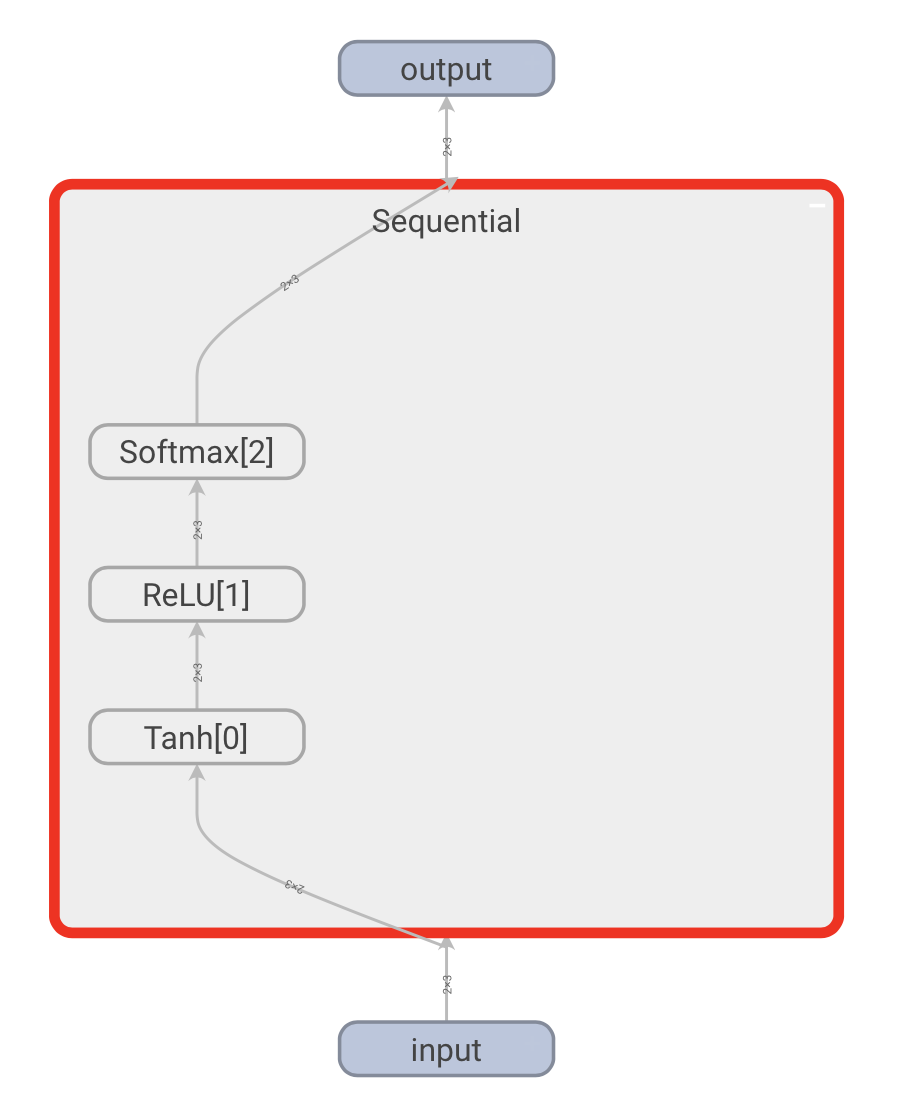

How can we define our own ```torch.nn.Module``` using functions that aren't part of torch.nn?

Answer: write our own module (don't worry about the exact formulation for now)

In [12]:
import torch
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter('runs/experiment_2')
class OurNet(torch.nn.Module):
    def __init__(self):
        super(OurNet,self).__init__()
    def forward(self,x):
        g = x*x + 1
        h = torch.log(g)
        k = torch.sin(h)
        return k
graph = OurNet()
writer.add_graph(graph,torch.randn((2,3)))
writer.close()

ModuleNotFoundError: No module named 'tensorboard'

We'll obtain the following computation graph:

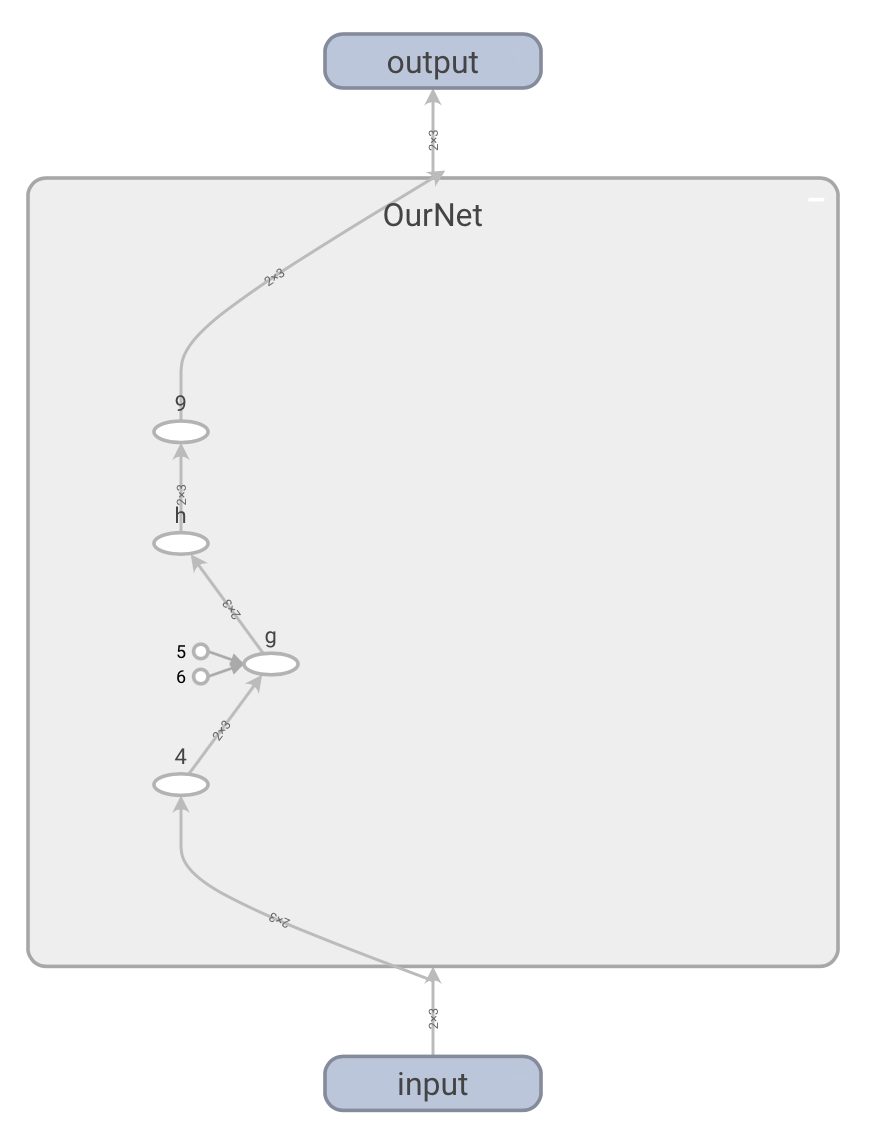